**DOWNLOADING DATASET FROM KAGGLE TO GOOGLE DRIVE**

Step 1:
Set up Kaggle API Key Log into Kaggle:
Go to Kaggle and log into your account.

Create API Token:
Go to your Kaggle account settings.
Scroll down to the "API" section and click Create New API Token.You will be asked to confirm the creation of the API token and then a kaggle.json file will be downloaded to your computer. This contains your API credentials.

Step 2: Upload API Key to Google Colab
Open your Google Colab notebook.
Upload the kaggle.json file to your Colab environment

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riyabangera","key":"880ce8863a711ab341c8d3126ed921ad"}'}

Step 3: Install Kaggle API and Authenticate
1.Install the Kaggle API in your Colab environment

In [ ]:
#Install the Kaggle API in your Colab environment
!pip install kaggle

In [ ]:
#Authenticate using the Kaggle API key
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


Step 4: Mount Google Drive

In [ ]:
#Mount your Google Drive to access it
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/indian_liver_data/

/content/drive/MyDrive/indian_liver_data


Step 5: Download the Kaggle Dataset
You can look for relevant datasets on kaggle using the search function. The dataset we will use here is the INDIAN LIVER PATIENTS RECORDS dataset.
To look up the dataset-Click on datasets in kaggle
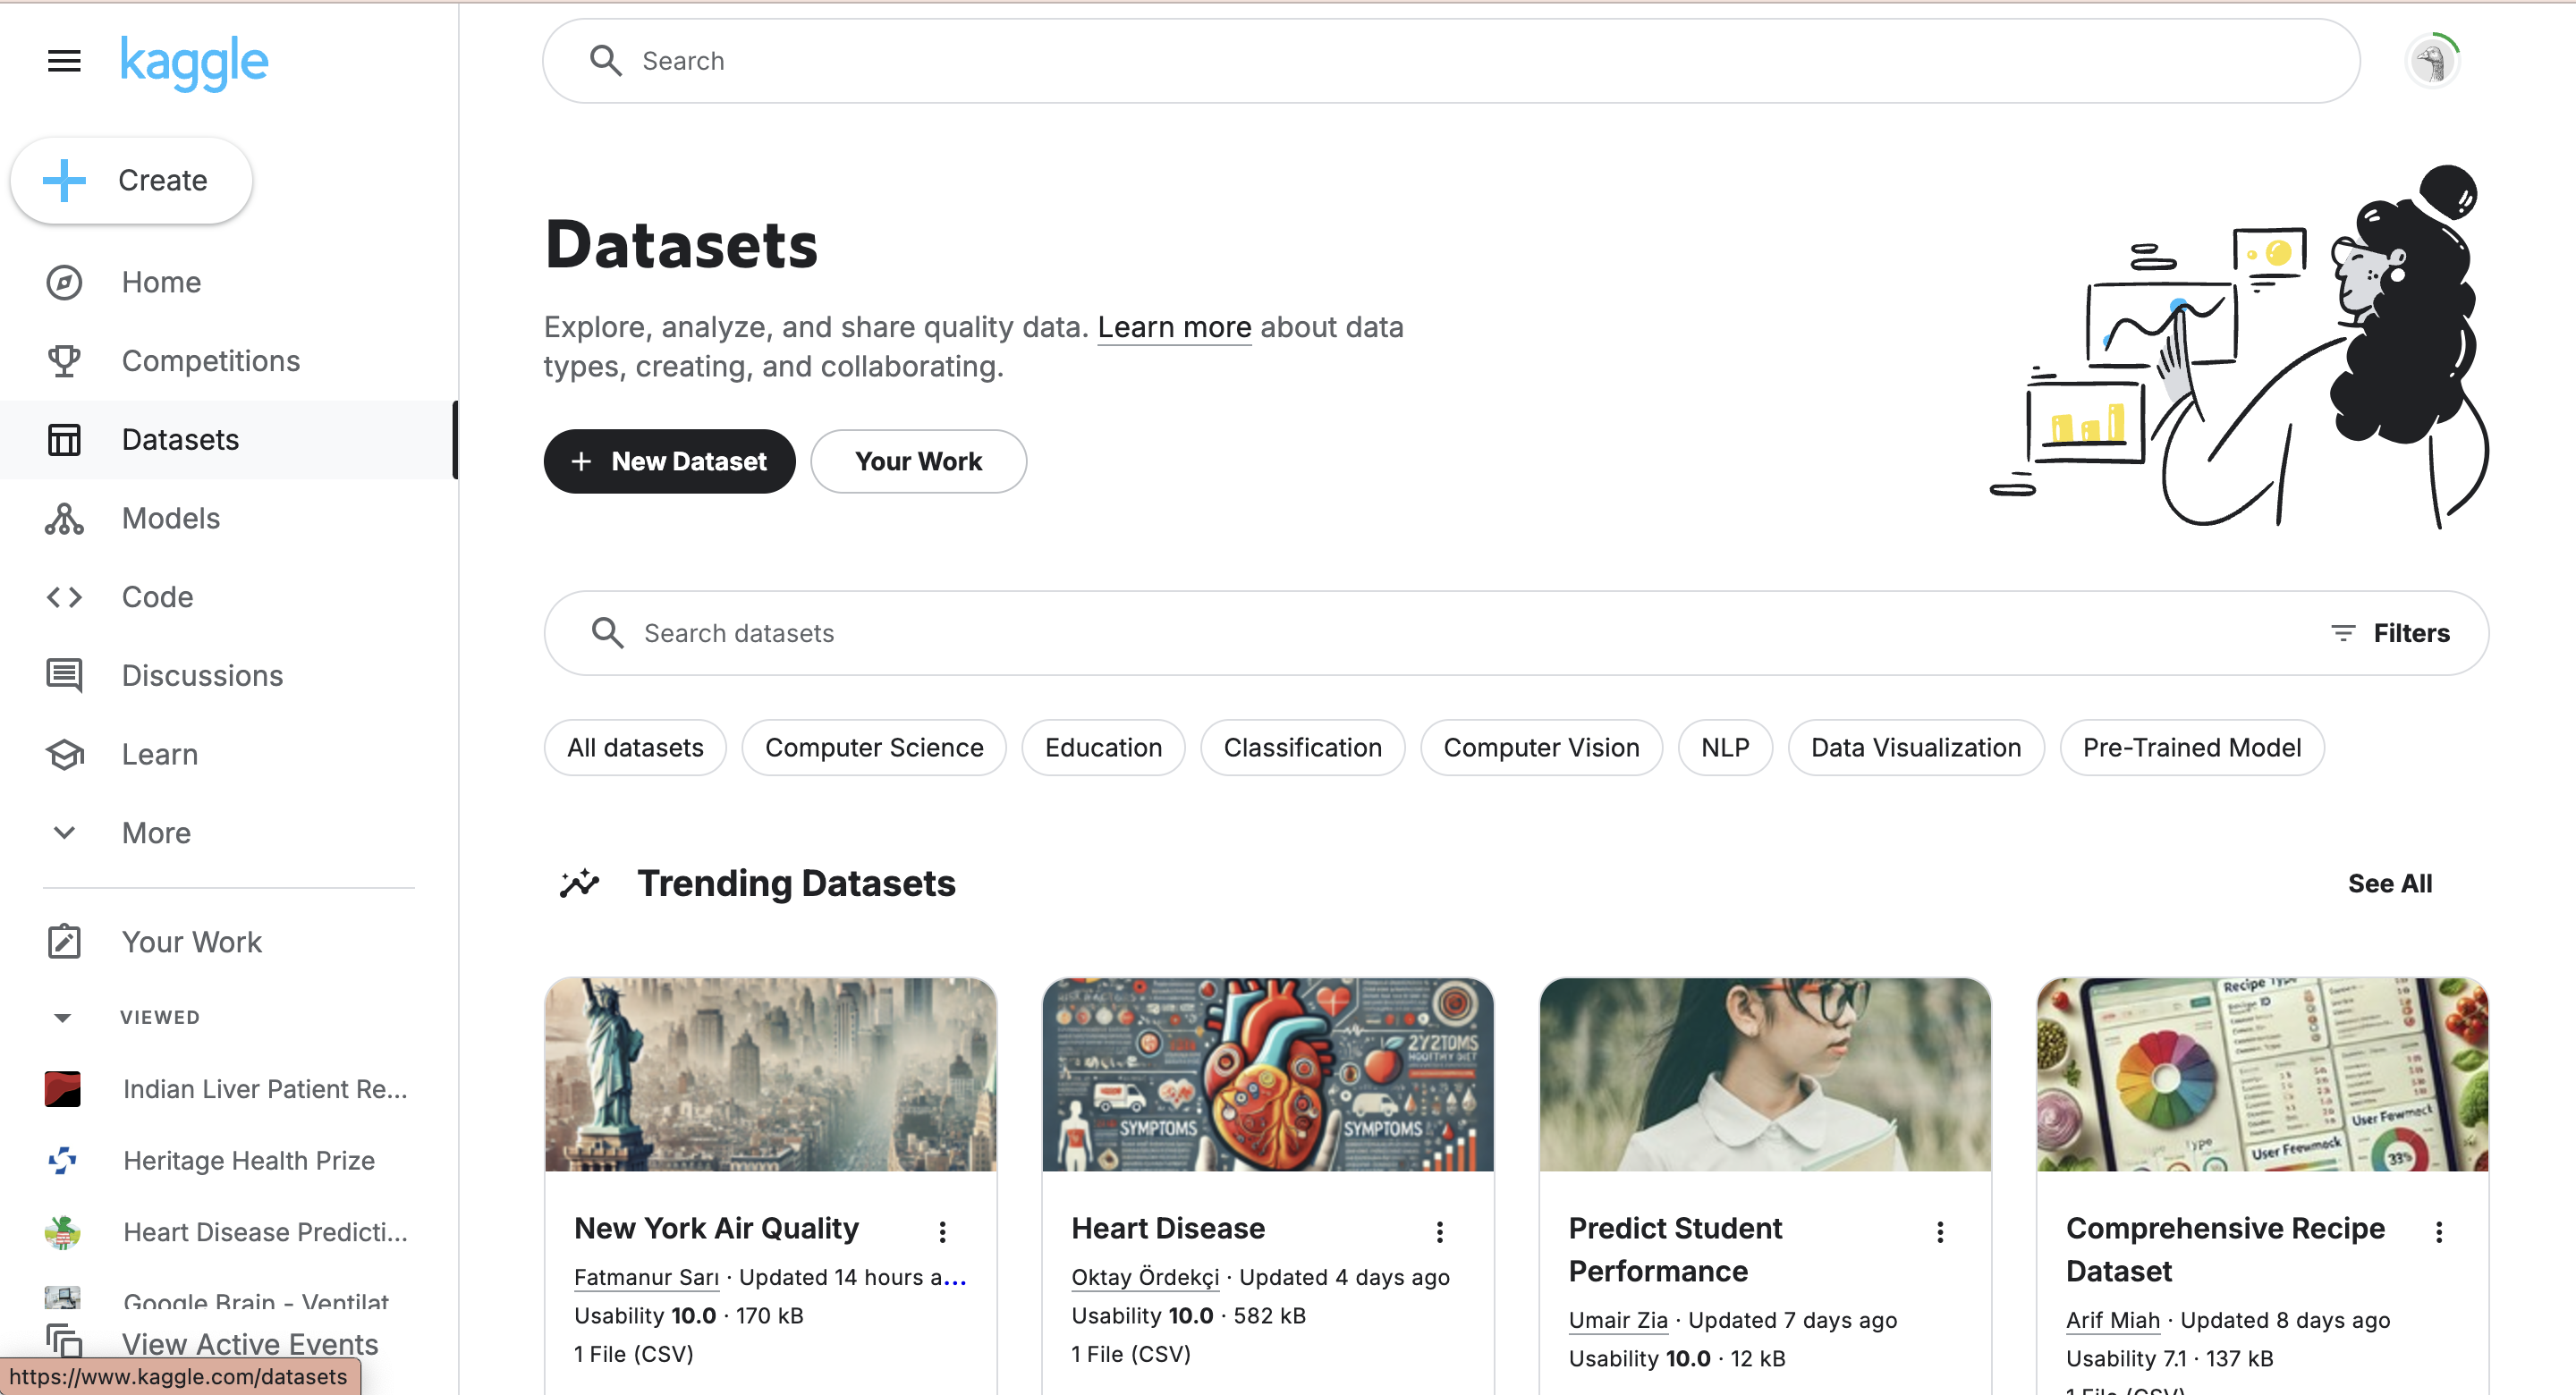

2.Search for datasets as per your requirements.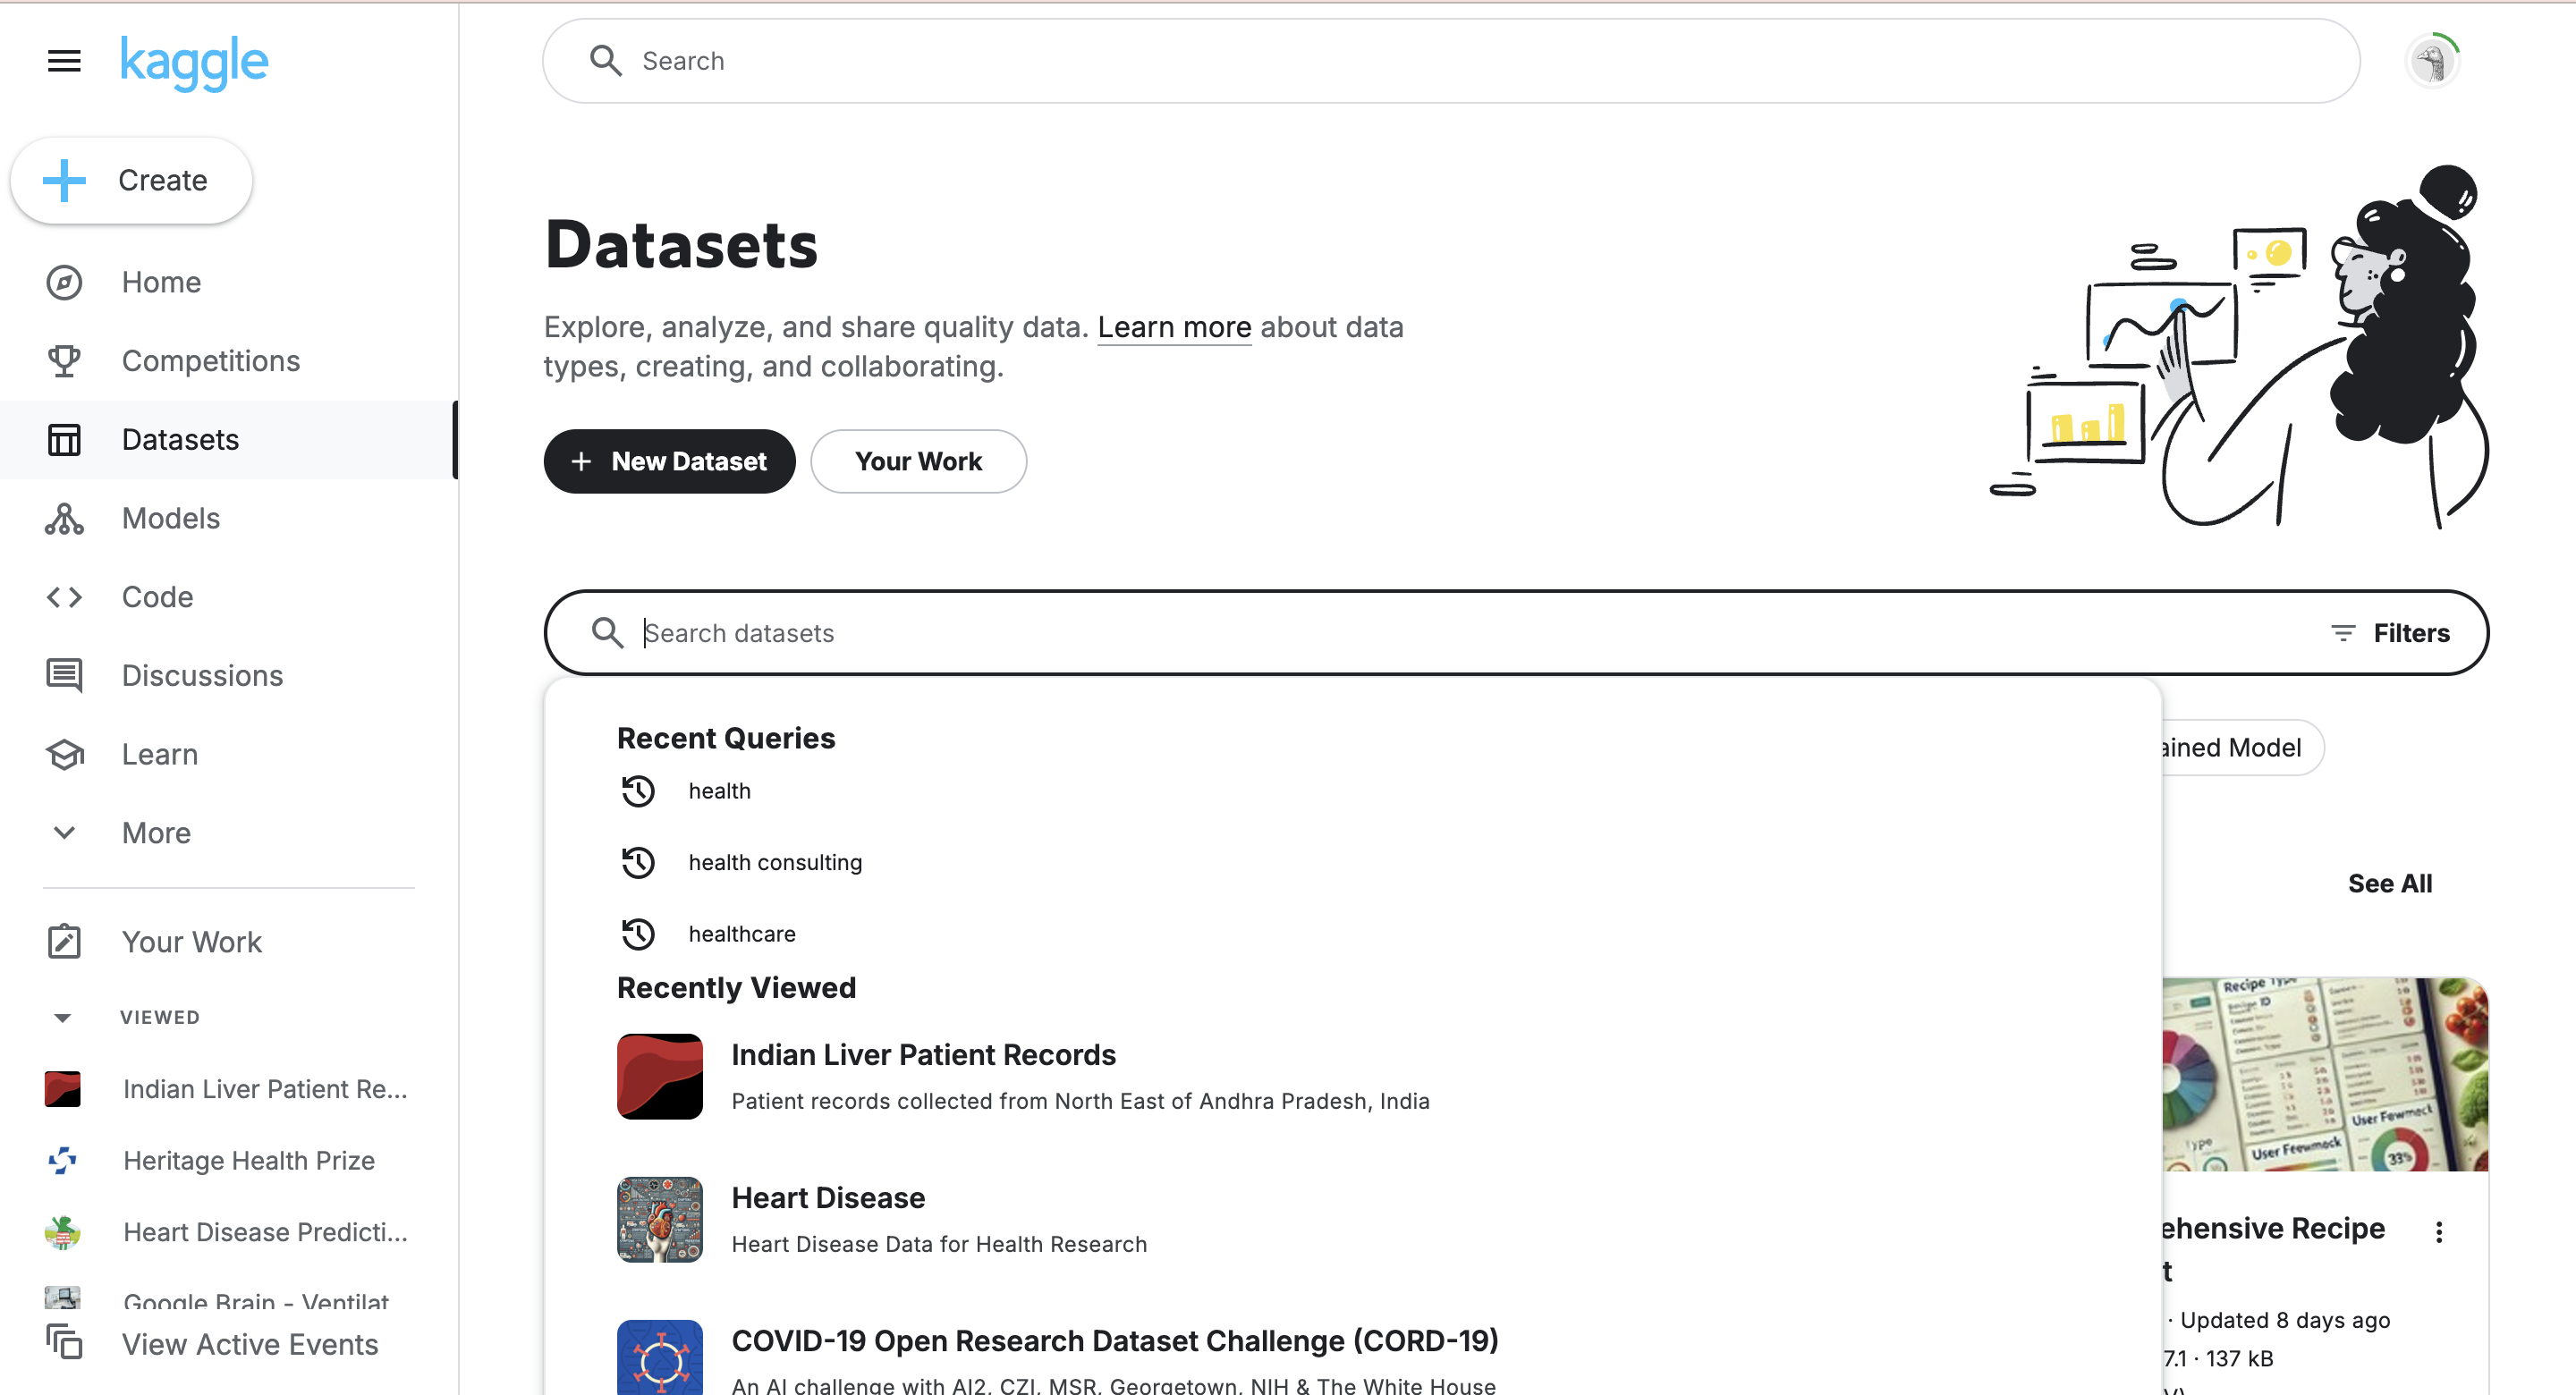

3.Find the name of your dataset through the dataset URL and use the Kaggle API to download the dataset to drive
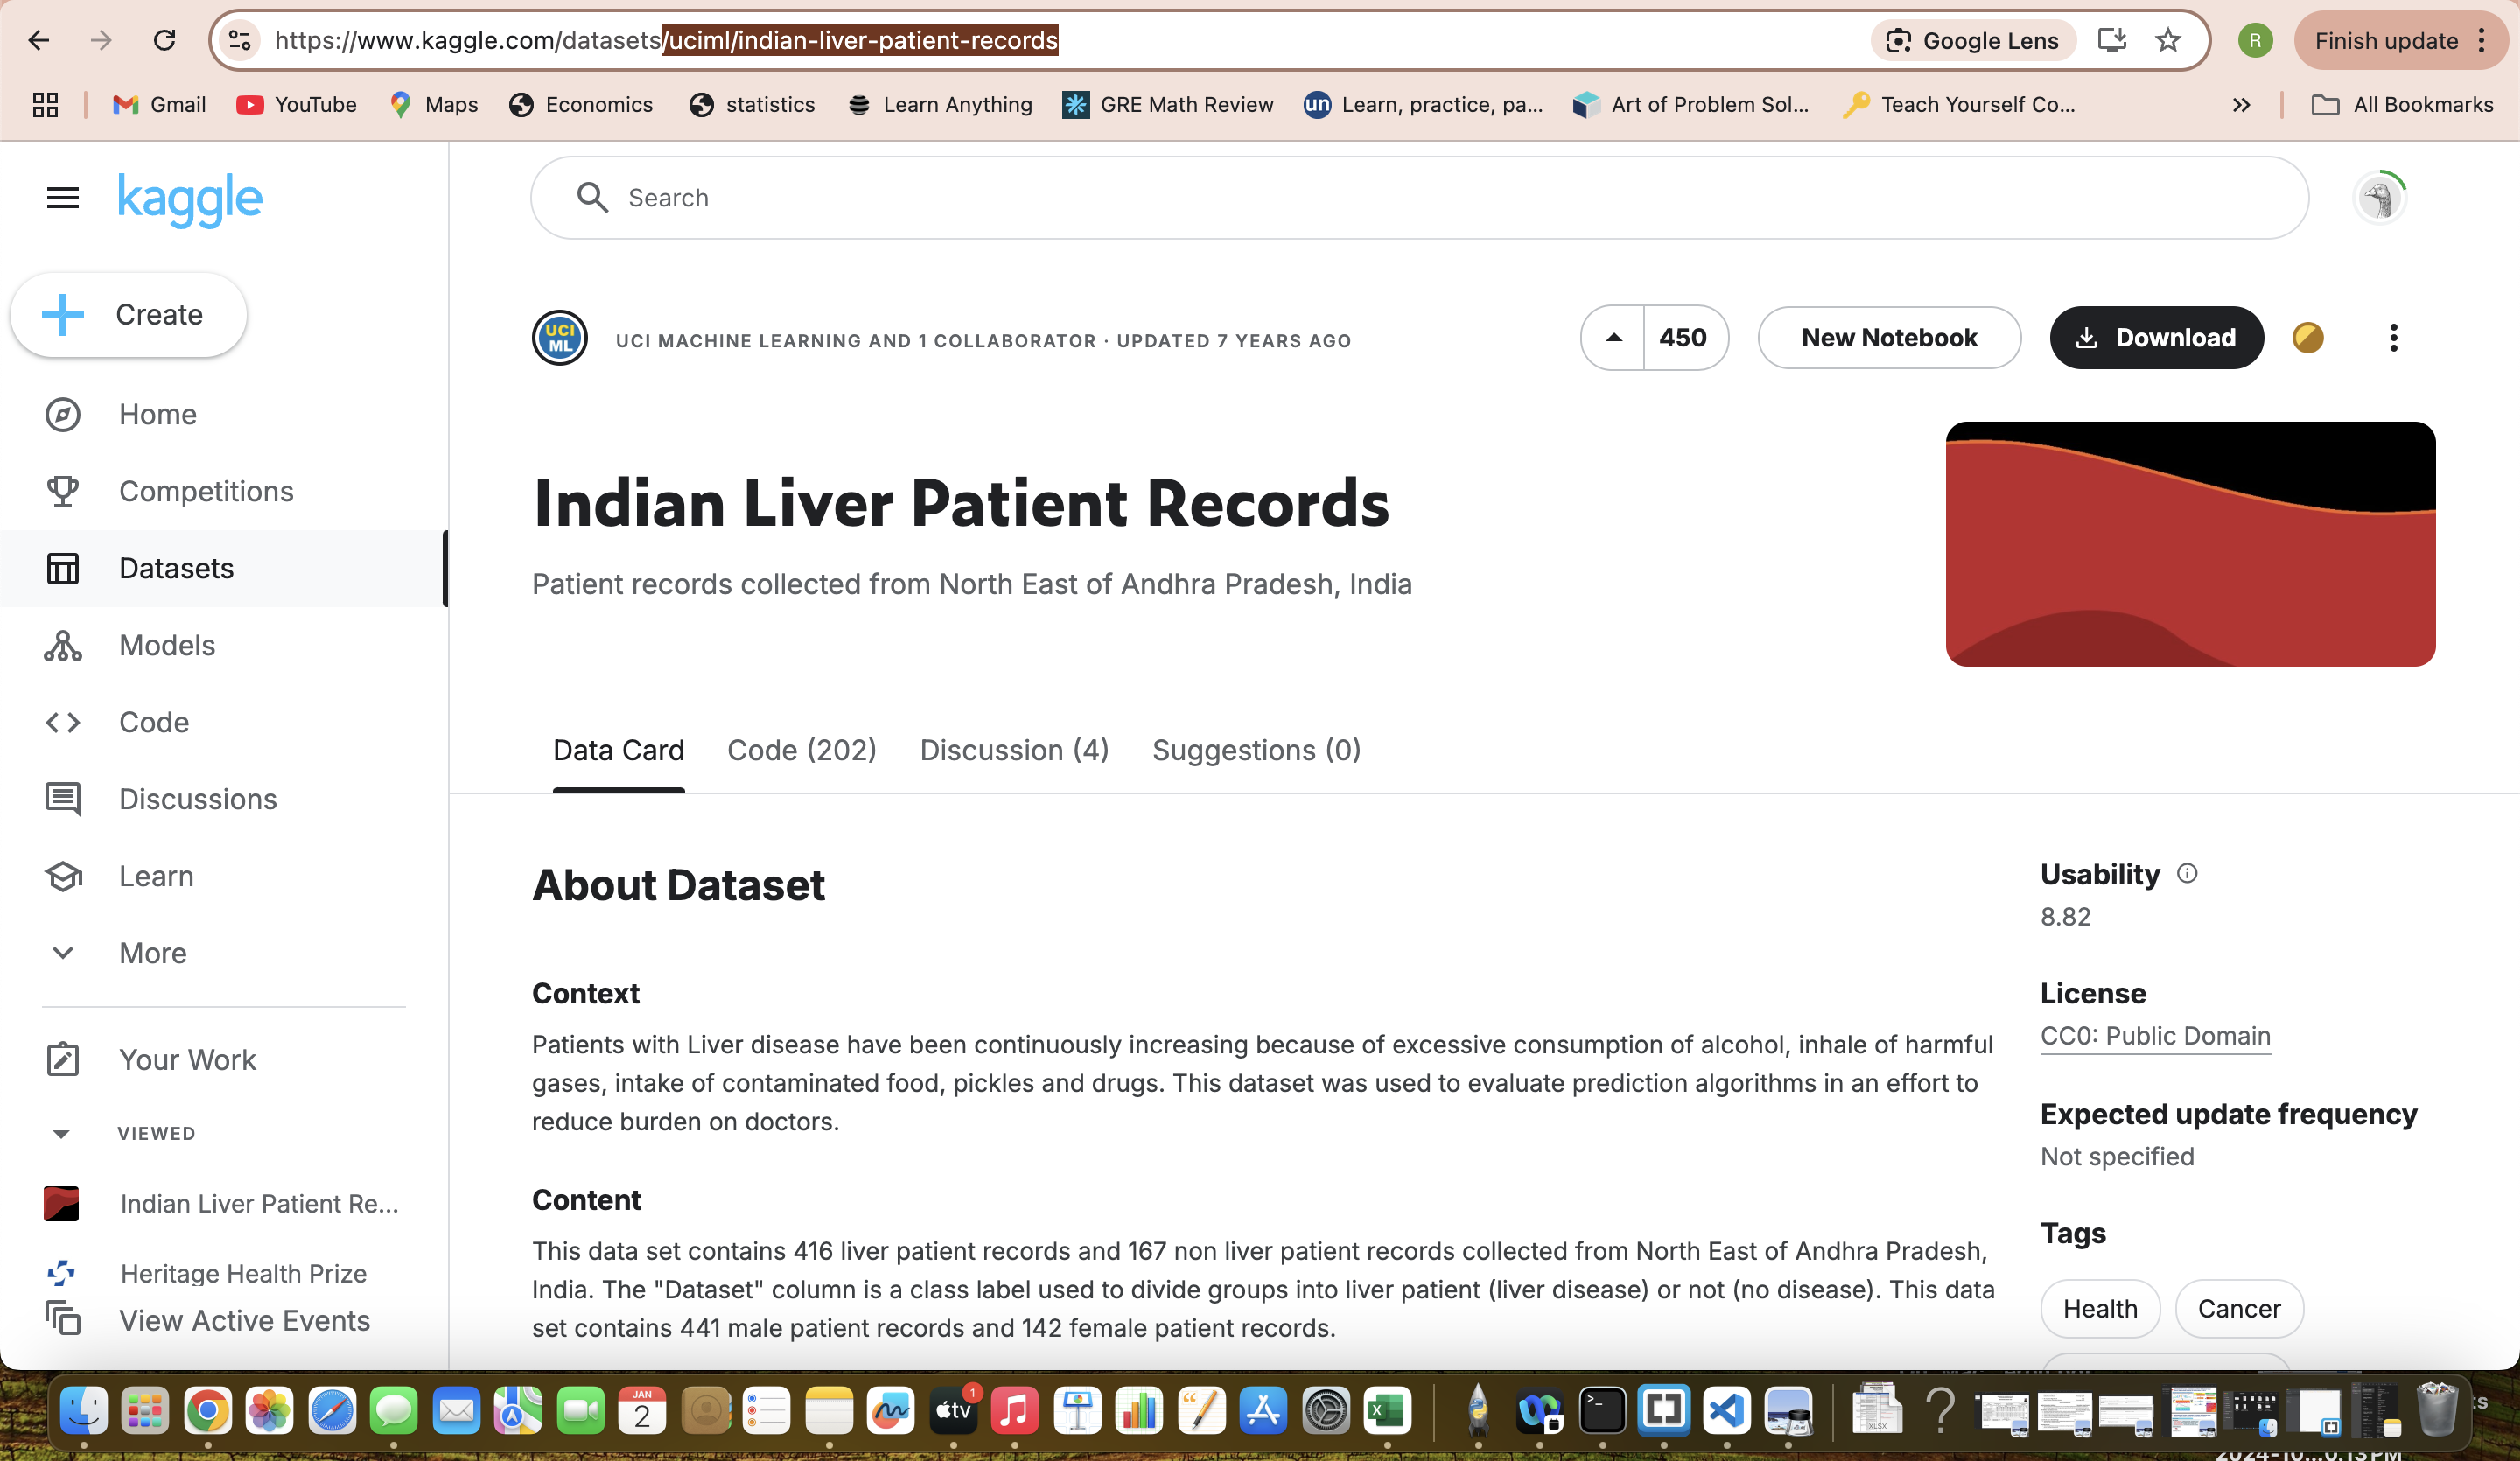

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
#Use the Kaggle API to download the dataset to your Google Drive
#Replace <dataset-name> with the name of the dataset you're downloading. For example, if the dataset URL is https://www.kaggle.com/datasets/uciml/mushroom-classification, the name would be uciml/mushroom-classification.
#The -p flag specifies the directory to download the dataset to, in this case, your Google Drive (/content/drive/MyDrive/).

!kaggle datasets download -d uciml/indian-liver-patient-records -p /content/drive/MyDrive/

Dataset URL: https://www.kaggle.com/datasets/uciml/indian-liver-patient-records
License(s): CC0-1.0
indian-liver-patient-records.zip: Skipping, found more recently modified local copy (use --force to force download)


Step 6: Extract the Dataset


In [ ]:
#If the dataset is in a compressed format (e.g., .zip), extract it using:
!unzip /content/drive/MyDrive/indian-liver-patient-records.zip -d /content/drive/MyDrive/indian_liver_data/


Archive:  /content/drive/MyDrive/indian-liver-patient-records.zip
replace /content/drive/MyDrive/indian_liver_data/indian_liver_patient.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/indian_liver_data/indian_liver_patient.csv  


**DATA EXPLORATION USING PANDAS LIBRARY IN PYTHON**

In [ ]:
import pandas as pd

In [ ]:
file_path='/content/drive/MyDrive/indian_liver_data/indian_liver_patient.csv'

In [ ]:
#pd.read_csv is a pandas function that reads a CSV file into a DataFrame, allowing easy data analysis and manipulation in Python.
df=pd.read_csv(file_path)

In [ ]:
#df.head() is a pandas method that returns the first 5 rows of a DataFrame by default, helping you quickly preview your data.
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [ ]:
#df.describe() is a pandas method that provides a summary of statistical measures for numerical columns in a DataFrame. It includes metrics like count, mean, standard deviation, min, max, and quartiles.
df.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio     Dataset  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

In [ ]:
#df.min() and df.max() are pandas methods used to find the minimum and maximum values for each column in a DataFrame.
df.min()


Age                                4
Gender                        Female
Total_Bilirubin                  0.4
Direct_Bilirubin                 0.1
Alkaline_Phosphotase              63
Alamine_Aminotransferase          10
Aspartate_Aminotransferase        10
Total_Protiens                   2.7
Albumin                          0.9
Albumin_and_Globulin_Ratio       0.3
Dataset                            1
dtype: object

In [ ]:
df.max()

Age                             90
Gender                        Male
Total_Bilirubin               75.0
Direct_Bilirubin              19.7
Alkaline_Phosphotase          2110
Alamine_Aminotransferase      2000
Aspartate_Aminotransferase    4929
Total_Protiens                 9.6
Albumin                        5.5
Albumin_and_Globulin_Ratio     2.8
Dataset                          2
dtype: object

In [ ]:
#df.dtypes (note: it is an attribute, not a method, so it doesn't require parentheses) returns the data type of each column in a pandas DataFrame.
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object